# Preliminary visual analysis of data
# Introduction to Seaborn, Scikit-Learn and K-Nearest Neighbors method

6.png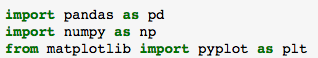

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### The first example is the prediction of a client leaving a telecom company

7.png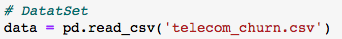

In [2]:
data = pd.read_csv("telecom_churn.csv")

8.png

In [3]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


9.png

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
# We have no data gaps !
# Churn - a column with the answer to whether the client left or not

## Introduction to Seaborn and Preliminary visual analysis of data

11.png

In [6]:
import seaborn as sns


In [7]:
# If 'seaborn' library is not installed, install it with the following command:

10.png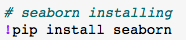

In [8]:
#!pip install seaborn
# if 'seaborn' is installed then ignore this command

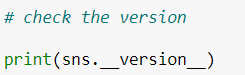

In [9]:
print(sns.__version__)

0.13.2


12.png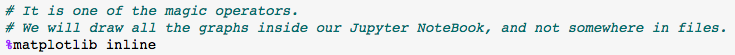

In [10]:
%matplotlib inline

#### Quantitative Features

13.png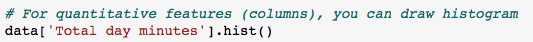

<Axes: >

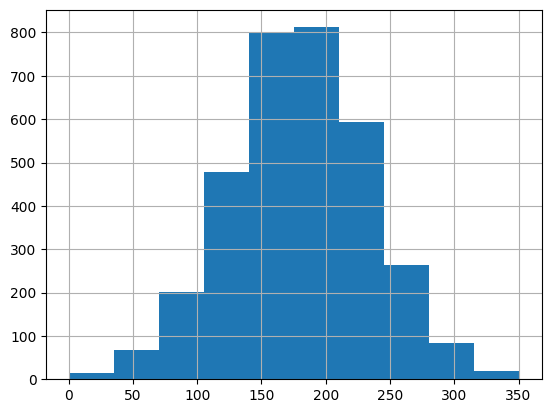

In [11]:
data["Total day minutes"].hist()

14.png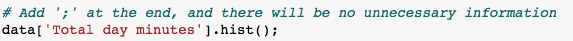

<Axes: >

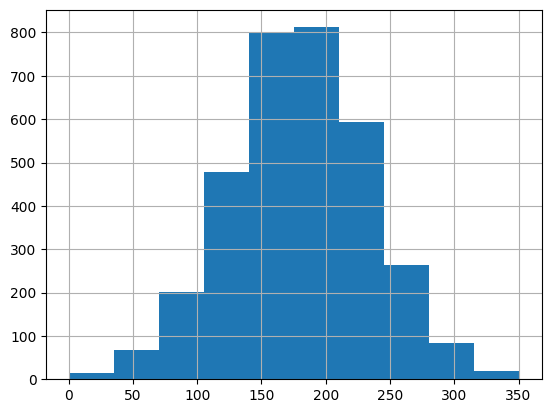

In [12]:
data["Total day minutes"].hist()

15.png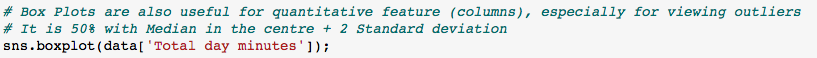

<Axes: ylabel='Total day minutes'>

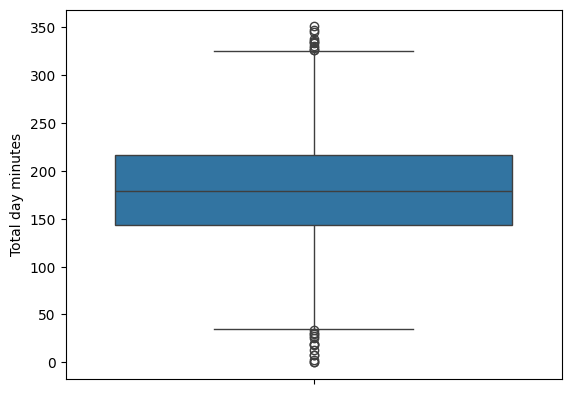

In [13]:
sns.boxplot(data["Total day minutes"])

In [14]:
sns.boxplot?

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    whis=1.5,
    linecolor='auto',
    linewidth=None,
    fliersize=None,
    hue_norm=None,
    native_scale=False,
    log_scale=None,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

See the :ref:`tutorial <categorical_tutorial>` for more i

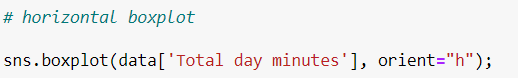

<Axes: xlabel='Total day minutes'>

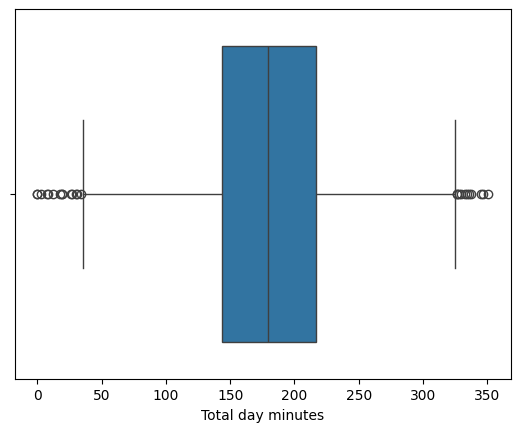

In [15]:
sns.boxplot(data['Total day minutes'], orient='h')

1.png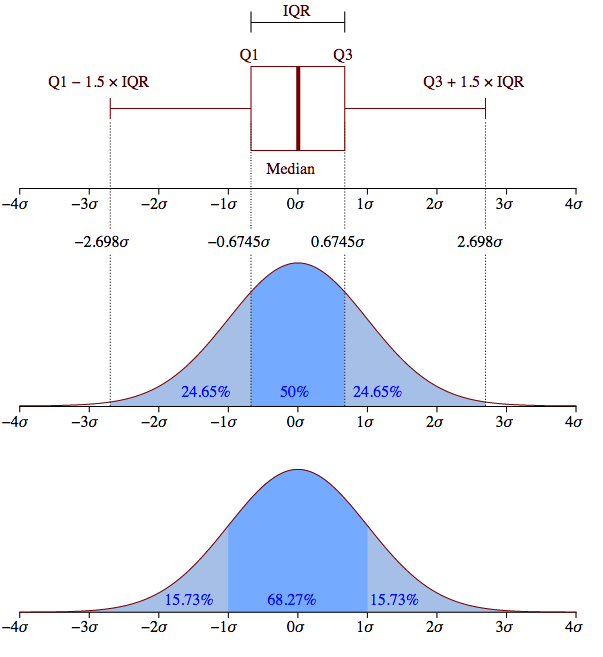

#### Categorical Features (including Binary Features)

In [16]:
# We have categorical feature: US State
# and two Binary features: 'International plan' and 'Voice mail plan'

16.png

In [17]:
data["State"].value_counts().head()

State
WV    106
MN     84
NY     83
AL     80
OH     78
Name: count, dtype: int64

17.png

In [18]:
data["Churn"].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

In [19]:
# how many clients left this company? Print the number.

In [20]:
sns.countplot?

Signature:
sns.countplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    stat='count',
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.

Note that :func:`histplot` function offers similar functionality with additional
features (e.g. bar stacking), although its default behavior is somewhat different.

See the :ref:`tutorial <categorical_tutorial>` for more information.

.. note::
    By default, this function treats one of the 

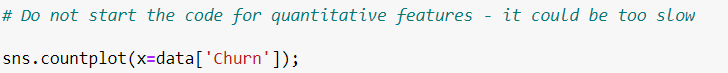

<Axes: xlabel='Churn', ylabel='count'>

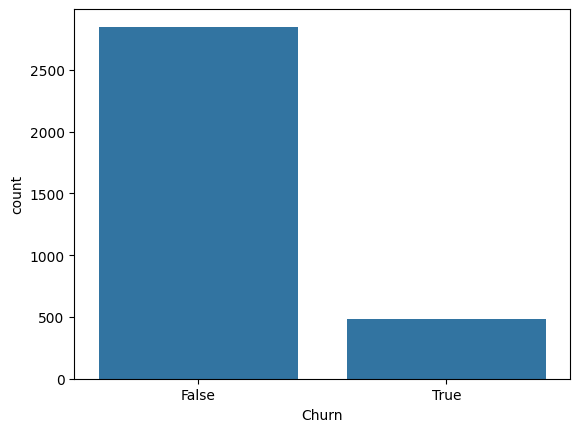

In [21]:
sns.countplot(x=data["Churn"]) 

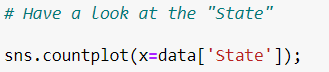

<Axes: xlabel='State', ylabel='count'>

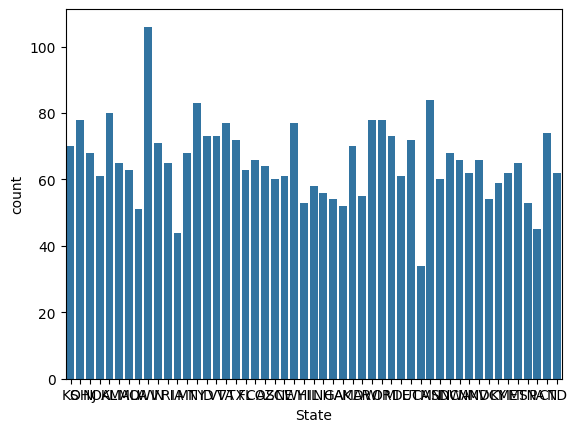

In [22]:
sns.countplot(x=data["State"])

20.png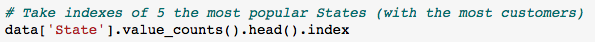

In [23]:
data["State"].value_counts().head().index

Index(['WV', 'MN', 'NY', 'AL', 'OH'], dtype='object', name='State')

In [24]:
# If the complex code in line below is difficult to understand, 
# please text each component separately, for example:

# data['State'].value_counts()

# data['State'].value_counts().head().index

# data['State'].value_counts().head().index

21.png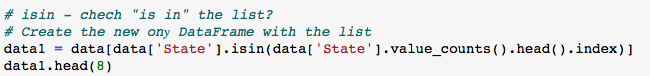

In [25]:
data1 = data[data["State"].isin(data["State"].value_counts().head().index)]
data1.head(8)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
62,MN,74,510,No,Yes,33,193.7,91,32.93,246.1,96,20.92,138.0,92,6.21,14.6,3,3.94,2,False
67,MN,113,408,Yes,No,0,125.2,93,21.28,206.4,119,17.54,129.3,139,5.82,8.3,8,2.24,0,False
71,MN,162,510,No,Yes,46,224.9,97,38.23,188.2,84,16.00,254.6,61,11.46,12.1,2,3.27,0,False


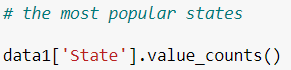

In [26]:
data1["State"].value_counts()

State
WV    106
MN     84
NY     83
AL     80
OH     78
Name: count, dtype: int64

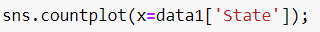

<Axes: xlabel='State', ylabel='count'>

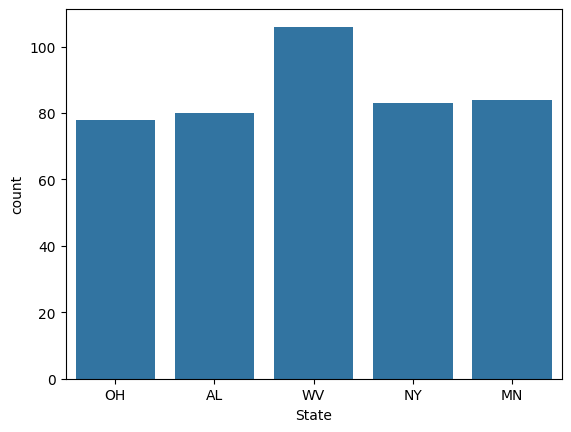

In [27]:
sns.countplot(x=data1["State"])

### Features Interactions

#### Quantitative - Quantitative

23.png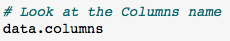

In [28]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

24.png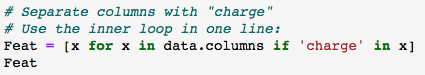

In [29]:
feat = [x for x in data.columns if 'charge' in x]
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

25.png

array([[<Axes: title={'center': 'Total day charge'}>,
        <Axes: title={'center': 'Total eve charge'}>],
       [<Axes: title={'center': 'Total night charge'}>,
        <Axes: title={'center': 'Total intl charge'}>]], dtype=object)

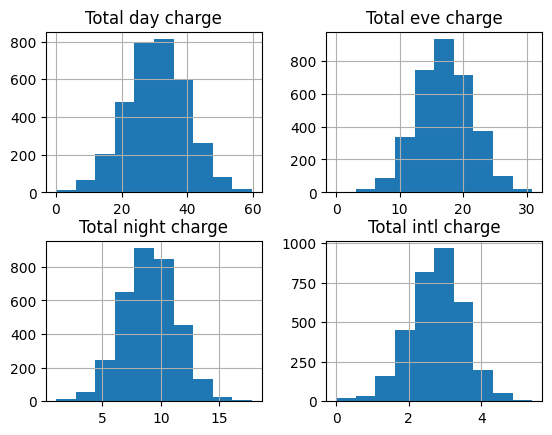

In [30]:
data[feat].hist()

In [31]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

26.png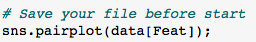

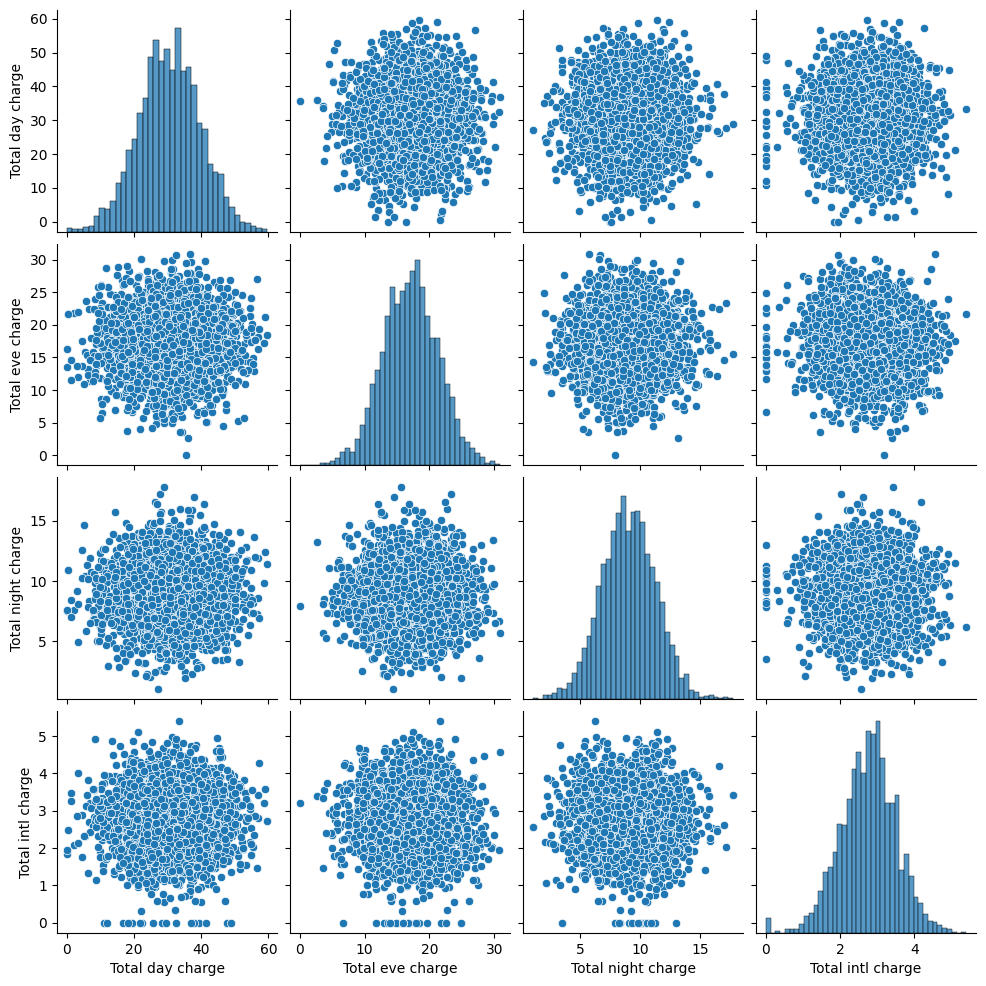

In [32]:
sns.pairplot(data[feat])

In [33]:
# It looks like a normal distribution which is not interesting for a data scientist

27.png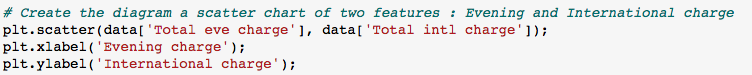

Text(0, 0.5, 'International Charge')

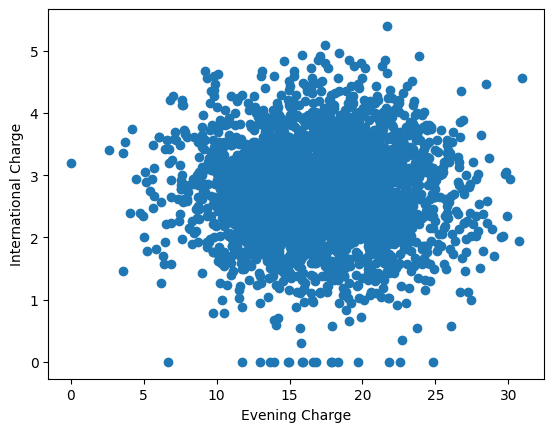

In [34]:
plt.scatter(data['Total eve charge'], data["Total intl charge"])
plt.xlabel("Evening Charge")
plt.ylabel("International Charge")

28.png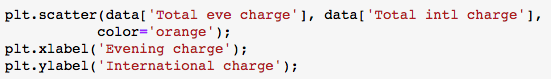

Text(0, 0.5, 'Total Intl Charge')

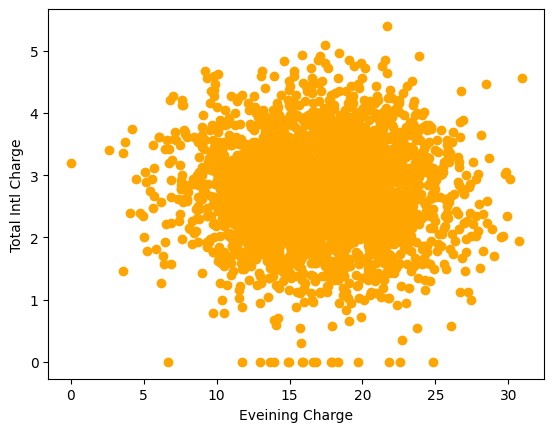

In [35]:
plt.scatter(data["Total eve charge"], data['Total intl charge'],color='orange')
plt.xlabel('Eveining Charge')
plt.ylabel('Total Intl Charge')

29.png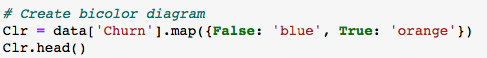

In [36]:
clr = data['Churn'].map({False: 'blue', True: 'orange'})
clr.head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

30.png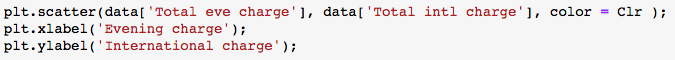

Text(0, 0.5, 'International Charge')

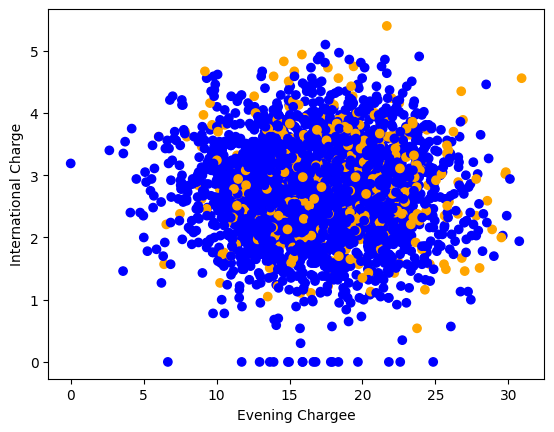

In [37]:
plt.scatter(data["Total eve charge"], data["Total intl charge"], color=clr)
plt.xlabel("Evening Chargee")
plt.ylabel("International Charge")

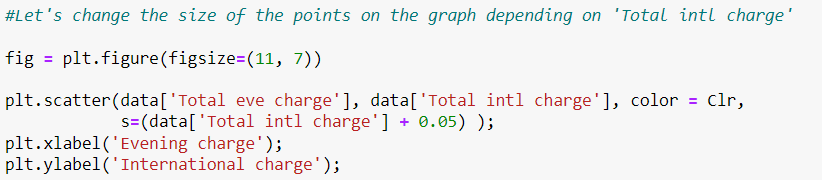

Text(0, 0.5, 'International charge')

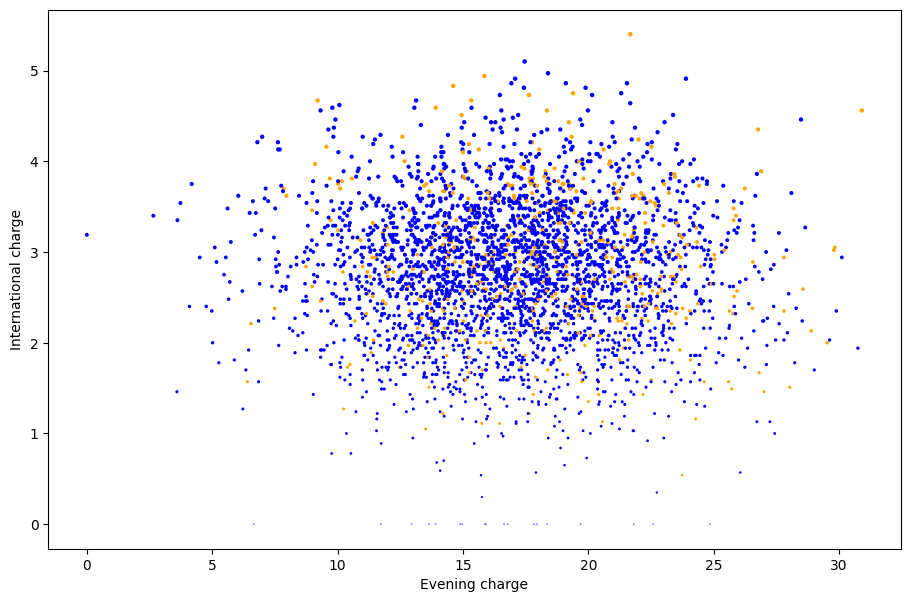

In [38]:
fig = plt.figure(figsize=(11, 7))
plt.scatter(data["Total eve charge"], data["Total intl charge"], color=clr, s=(data["Total intl charge"] + 0.05))
plt.xlabel("Evening charge")
plt.ylabel("International charge")

### Quantitative vs Categorical (Binary)

33.png

<Axes: xlabel='Churn', ylabel='Total day minutes'>

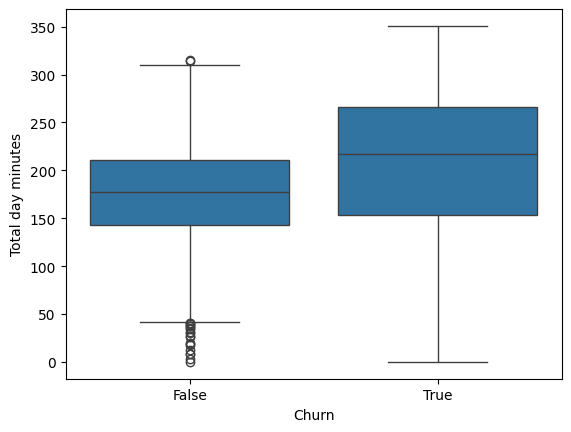

In [39]:
sns.boxplot(x="Churn", y="Total day minutes", data=data)

In [40]:
# The medians are very different in these features.
# Therefore, clients who left had a lot of talk minutes!

35.png

<Axes: xlabel='State', ylabel='Total day minutes'>

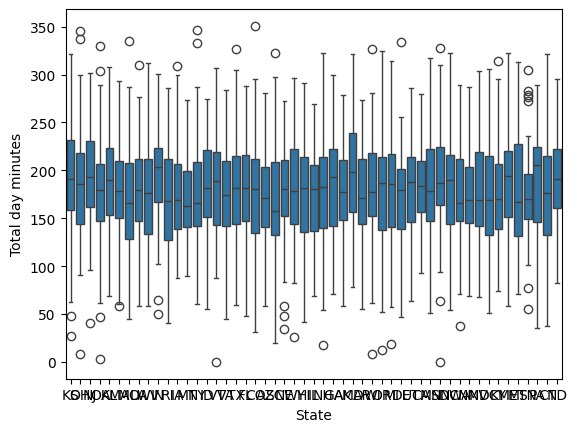

In [41]:
sns.boxplot(x="State", y="Total day minutes", data=data)

In [42]:
# It is not informative to have a notebook 

### Interaction of Two Categorical (Binary) Features

36.png

In [43]:
pd.crosstab(data['Churn'], data['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


37.png

<Axes: xlabel='International plan', ylabel='count'>

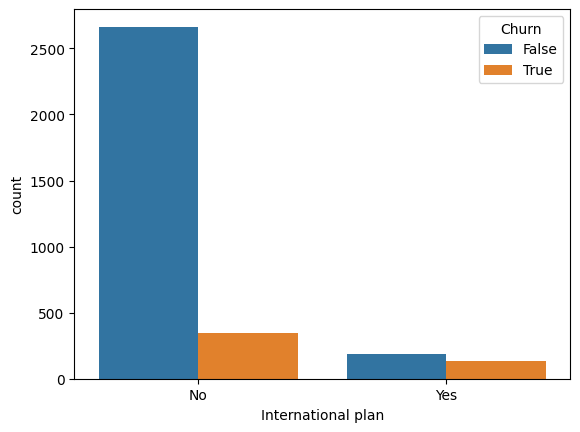

In [44]:
sns.countplot(x="International plan", hue="Churn", data=data)

In [45]:
# This is an interesting conclusion - connecting to international roaming dramatically 
# increases the probability of a client leaving!

38.png

<Axes: xlabel='Customer service calls', ylabel='count'>

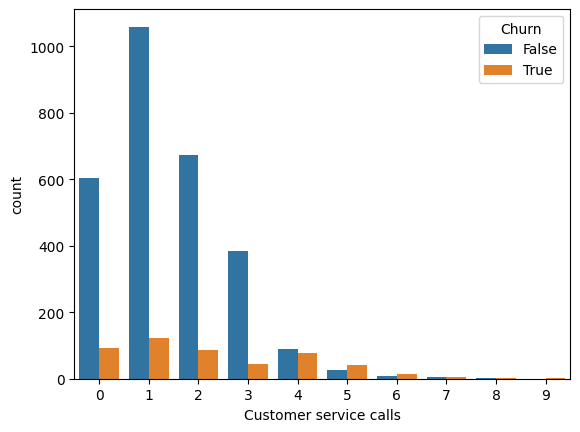

In [46]:
sns.countplot(x="Customer service calls", hue="Churn", data=data)

In [47]:
# One more interesting conclusion.
# If a customer calls the service centre 4(four) or more times, then they are ready to leave!

### Correlation Matrix and Heat Map

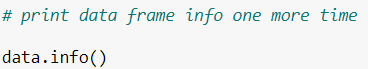

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

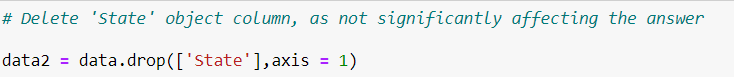

In [49]:
data2 = data.drop(['State'], axis=1)

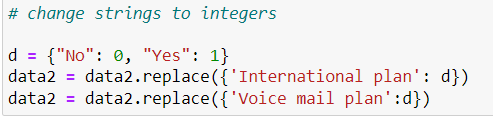

In [50]:
d = {"No": 0, "Yes": 1}
data2 = data2.replace({"International plan": d})
data2 = data2.replace({"Voice mail plan": d})

/tmp/ipykernel_153810/675430295.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2 = data2.replace({"International plan": d})
/tmp/ipykernel_153810/675430295.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2 = data2.replace({"Voice mail plan": d})


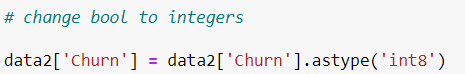

In [51]:
data2["Churn"] = data2["Churn"].astype('int8')

In [52]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [53]:
# Now we have only digital data, therefore we can build a correlation matrix

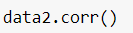

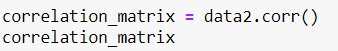

In [54]:
data2.corr()

correlation_matrix = data2.corr()
correlation_matrix

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


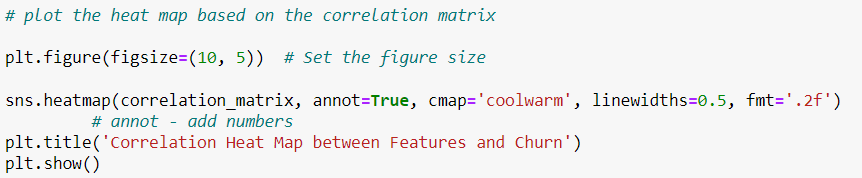

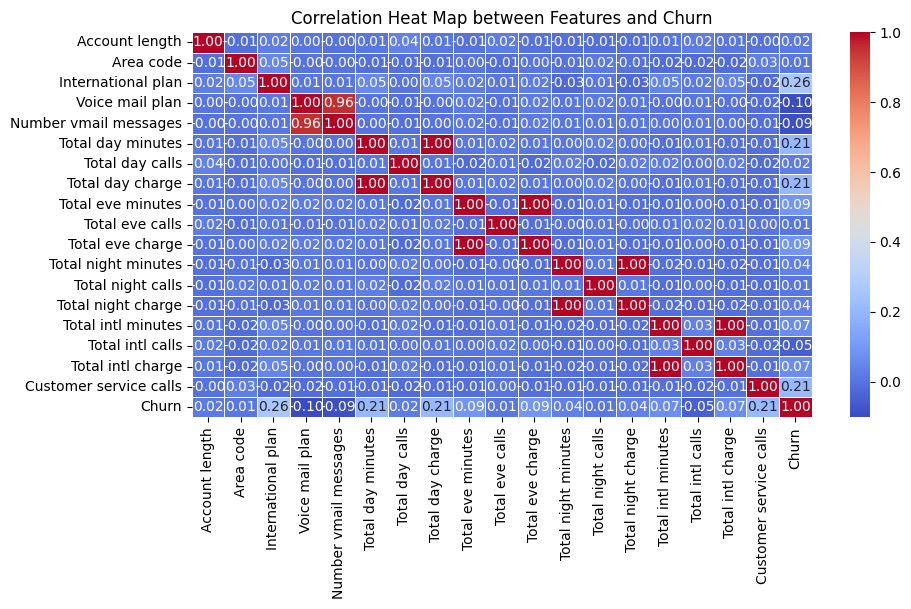

In [55]:
plt.figure(figsize=(10,5)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heat Map between Features and Churn")
plt.show()

In [56]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [57]:
# charges are directly proportional to the minutes of conversation - these are dependent variables

In [58]:
# Describe below which features strongly influence (correlate) 'Churn' answer column

## K-Nearest Neighbors method

#### The Nearest Neighbor Method (K-Nearest Neighbor, or kNN) is a popular supervised classification algorithm. 

#### The essence of the method is intuitive and understandable: 
- look at the neighbours,
- you are the same as most of them.

Unlike other machine learning algorithms, the k-nearest-neighbour method starts computing only at the time of classification of the test case. Thus, there is no prior model training. It is a non-parametric model. The book ["The Elements of Statistical Learning"](https://web.stanford.edu/~hastie/Papers/ESLII.pdf) declares that the kNN method is a theoretically ideal algorithm, the applicability of which is limited by computational capabilities and the curse of dimensions.

This tutorial aims to classify whether a customer tends to churn or not depending on his/her other features. Scikit-Learn library is introduced to perform this classification task. 


<html> <h4 style="font-style:italic; color:Red;"> It is necessary to convert all features to numbers for training models in Scikit-Learn. </h4> </html>


In [59]:
# Data pre-processing is necessary
# We have done it in new data frame - data2

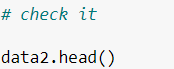

In [60]:
data2.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [61]:
# All features and the Terget above are numerical

In [62]:
# The next step is typical for any machine learning model. 
# splitting data into 'Input' and 'Output' parameters.

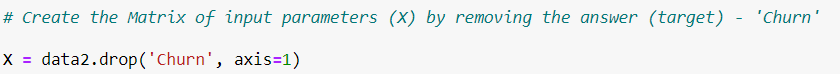 

In [63]:
X = data2.drop("Churn", axis=1)

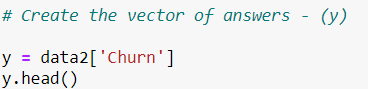

In [64]:
y = data2["Churn"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int8

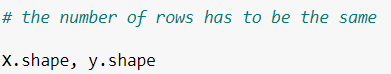 

In [65]:
X.shape, y.shape

((3333, 18), (3333,))

#### Basics of dividing data into training, validation and testing parts
There are modules in Scikit-Learn that splits the data into train/test sets


2.png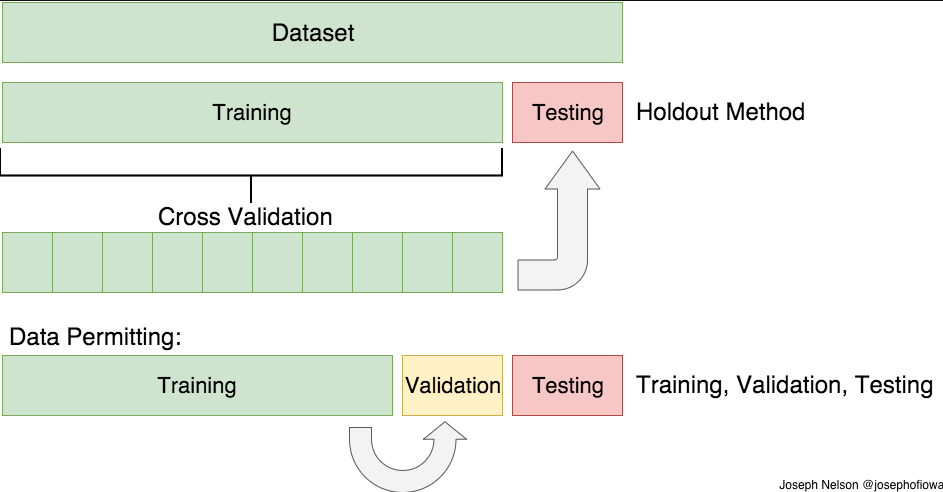

48.png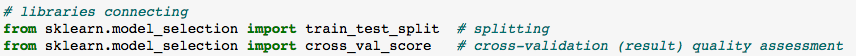

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

49.png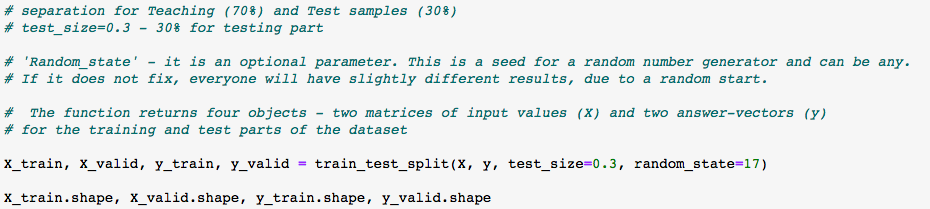

In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((2333, 18), (1000, 18), (2333,), (1000,))

In [68]:
# 2333 rows for trening and 1000 rows for testing

## IMPORTANT 

- install the previous version 'Scikit-learn', since the latest one contains an error in cross_val_score
- Run code in the next cell

In [ ]:
pip install scikit-learn==0.21.0

ERROR: Could not find a version that satisfies the requirement scikit-learn==0.21.0 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0, 1.2.1, 1.2.2, 1.3.0rc1, 1.3.0, 1.3.1, 1.3.2, 1.4.0rc1, 1.4.0, 1.4.1.post1, 1.4.2, 1.5.0rc1, 1.5.0, 1.5.1, 1.5.2)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for scikit-learn==0.21.0
Note: you may need to restart the kernel to use updated packages.


In [70]:
# pip show scikit-learn  # to see which version and where scikit-learn is installed

### Training

50.png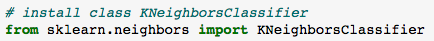

In [93]:
from sklearn.neighbors import KNeighborsClassifier

51.png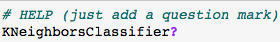

In [94]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

4.png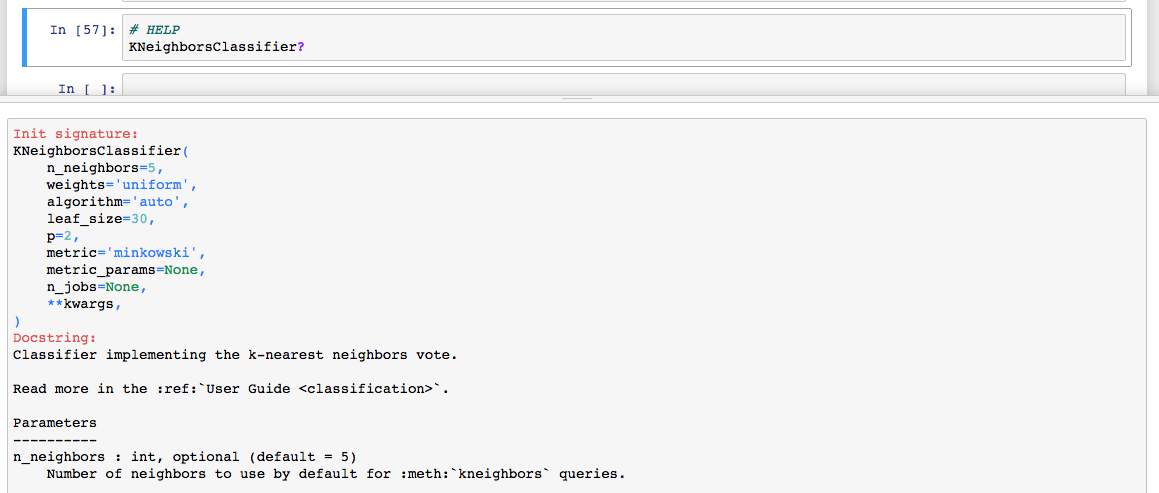

In [71]:
# Default parameter n_neighbors=5
# The default is the 5-nearest neighbours method
# First, train the model for n_neighbors=5 (default)

52.png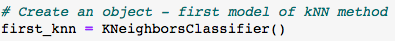

In [95]:
first_knn = KNeighborsClassifier()

5.png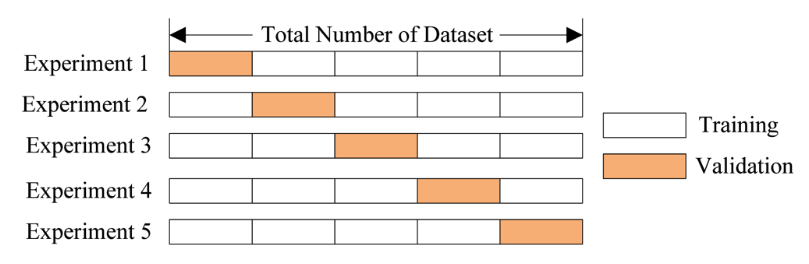

53.png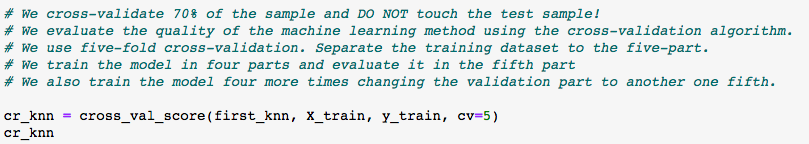

In [96]:
cr_knn = cross_val_score(first_knn, X_train, y_train, cv=5)

In [72]:
# We have five numbers: 5 times the tree was trained for 80% (4/5) of 70% (the training part of the dataset) and 
# validated five times for 20% (1/5) of 70% (the training part of the dataset).
# These five digits are the accuracy of the check on each part of 20%.
# These numbers should be approximately the same. If not, then it means we have problems with data or with 
# data separation (dips in samples, etc.)

# У нас есть пять чисел: 5 раз дерево обучалось на 80% (4/5) из 70% (обучающая часть набора данных) и 
# проверено пять раз для 20% (1/5) из 70% (обучающая часть набора данных). 
# Эти пять цифр обозначают точность проверки по каждой части 20%. 
# Эти числа должны быть примерно одинаковыми. Если нет, то значит у нас проблемы с данными или с 
# разделение данных (провалы в пробах и т.д.)

54.png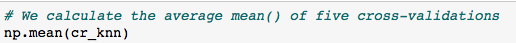

In [97]:
np.mean(cr_knn)

np.float64(0.8671274043984523)

In [73]:
# The accuracy is only 86.7%

In [74]:
# It is becouse the data was not normilised

# With data normalisation, accuracy should be higher

#### K-nearest neighbors requires scaled (normilised) data [0,1]

55.png

In [98]:
from sklearn.preprocessing import MinMaxScaler

56.png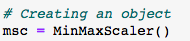

In [99]:
msc = MinMaxScaler()

57.png

In [100]:
data2.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

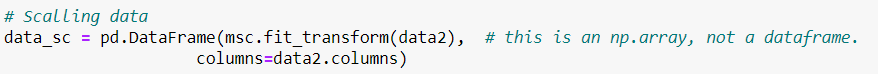

In [102]:
data_sc = pd.DataFrame(msc.fit_transform(data2), columns=data2.columns)

In [ ]:
msc.fit_transform?

Signature: msc.fit_transform(X, y=None, **fit_params)
Docstring:
Fit to data, then transform it.

Fits transformer to `X` and `y` with optional parameters `fit_params`
and returns a transformed version of `X`.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Input samples.

y :  array-like of shape (n_samples,) or (n_samples, n_outputs),                 default=None
    Target values (None for unsupervised transformations).

**fit_params : dict
    Additional fit parameters.

Returns
-------
X_new : ndarray array of shape (n_samples, n_features_new)
    Transformed array.
File:      ~/Desktop/Projects/intro-ml/.venv/lib64/python3.12/site-packages/sklearn/base.py
Type:      method

59.png

In [104]:
data_sc.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0.524793,0.068627,0.0,1.0,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.068627,0.0,1.0,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.068627,0.0,0.0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,0.000000,1.0,0.0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,0.068627,1.0,0.0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0


60.png

In [105]:
data_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   float64
 1   Area code               3333 non-null   float64
 2   International plan      3333 non-null   float64
 3   Voice mail plan         3333 non-null   float64
 4   Number vmail messages   3333 non-null   float64
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   float64
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   float64
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   float64
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

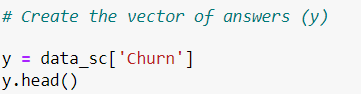

In [106]:
y = data_sc['Churn']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Churn, dtype: float64

62.png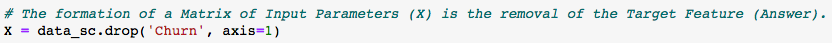

In [107]:
X = data_sc.drop('Churn', axis=1)

63.png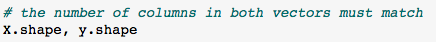

In [108]:
X.shape, y.shape

((3333, 18), (3333,))

64.png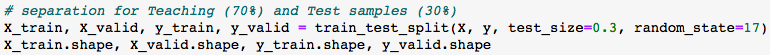

In [109]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=17, test_size=0.3)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((2333, 18), (1000, 18), (2333,), (1000,))

65.png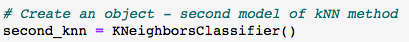

In [110]:
second_knn = KNeighborsClassifier()

66.png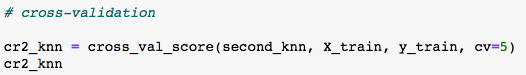

In [111]:
cr2_knn = cross_val_score(second_knn, X_train, y_train, cv=5)
cr2_knn

array([0.88222698, 0.88222698, 0.875803  , 0.88626609, 0.88841202])

67.png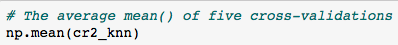

In [112]:
np.mean(cr2_knn)

np.float64(0.8829870141805516)

In [76]:
# Model accuracy increased to 88.3 % after data normalisation !

### Selection of the best number of Nearest Neighbors

68.png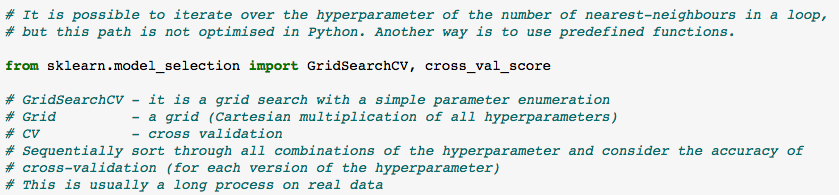

In [113]:
from sklearn.model_selection import GridSearchCV, cross_val_score

69.png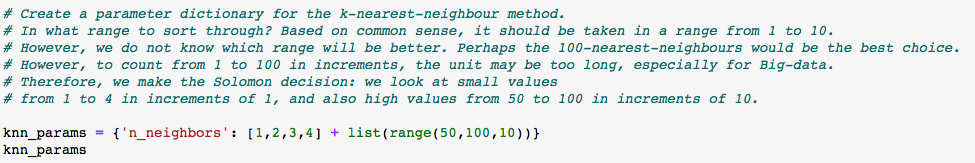

In [114]:
knn_params = {'n_neighbors': [1,2,3,4] + list(range(50,100,10))}

70.png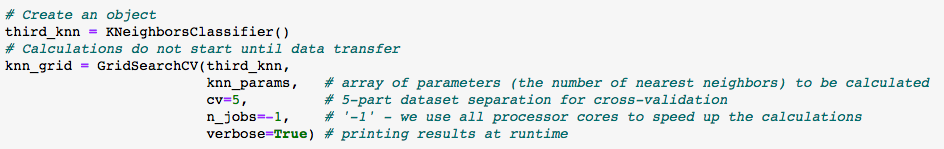

In [115]:
third_knn = KNeighborsClassifier()
knn_grid = GridSearchCV(third_knn, knn_params, cv=5, n_jobs=1, verbose=True)

71.png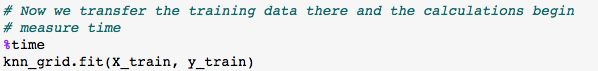

In [116]:
%time
knn_grid.fit(X_train, y_train)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 6.2 μs
Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 50, 60, 70, 80, 90]},
             verbose=True)

In [77]:
# another possible system response

In [78]:
# another possible system response

In [79]:
# As a result, we have a trained knn_grid object on which cross-validation was performed.
# look what is inside this object:
# text 'tree_grid.be' and click <Tab >, and ee a hint:

# knn_grid.best_estimator_    - this is the best model
# knn_grid.best_params_       - this is the best combination of hyperparameters
# knn_grid.best_score_        - this is the best cross validation accuracy



# В результате у нас есть обученный объект knn_grid, на котором была проведена перекрестная проверка. 
# посмотрим, что находится внутри этого объекта: 
# отправьте текст 'tree_grid.be' и нажмите <Tab >, и вы увидите подсказку: 

#knn_grid.best_estimator_ — это лучшая модель 
#knn_grid.best_params_ — это лучшее сочетание гиперпараметров 
#knn_grid.best_score_ — это лучшая точность перекрестной проверки

72.png

In [117]:
knn_grid.best_params_

{'n_neighbors': 3}

73.png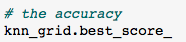

In [118]:
knn_grid.best_score_

np.float64(0.8787052779590299)

In [80]:
# However, this is not an exact answer because we know that with L = 5 the accuracy is better.
# Nevertheless, the result allows not to consider a large number of neighbours of 50 or more.

#### Conclusion - we start another search for hyperparameters, sorting from 5 to 30 (inclusive) with a step of 5

74.png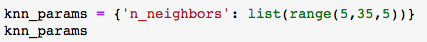

In [119]:
knn_params = {'n_neighbors': list(range(5,35,5))}
knn_params

{'n_neighbors': [5, 10, 15, 20, 25, 30]}

75.png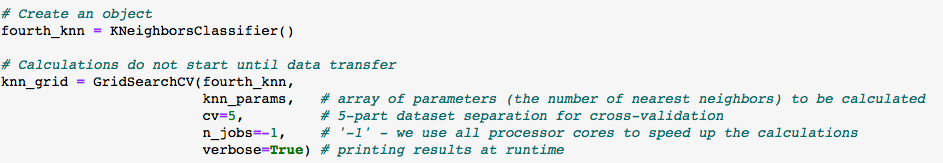

In [121]:
fourth_knn = KNeighborsClassifier()
knn_grid = GridSearchCV(fourth_knn, knn_params, cv=5, n_jobs=-1, verbose=True)

76.png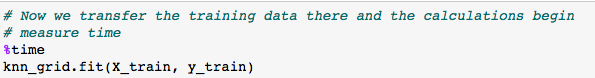

In [122]:
%time
knn_grid.fit(X_train, y_train)

CPU times: user 3 μs, sys: 1 μs, total: 4 μs
Wall time: 5.48 μs
Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30]}, verbose=True)

In [81]:
# another possible system response

In [82]:
# another possible system response

77.png

In [123]:
knn_grid.best_params_

{'n_neighbors': 5}

In [83]:
# in the region of 5..9 neighbors (the range is now clear)

78.png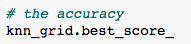

In [124]:
knn_grid.best_score_

np.float64(0.8829870141805516)

#### We launch the third - a more accurate search for hyperparameters. 
#### We will go over from 1 to 12 (inclusive) with step 1 (for the subsequent demonstration).

Запускаем третий — более точный поиск гиперпараметров. 

Пройдемся от 1 до 12 (включительно) с шагом 1 (для последующей демонстрации).

79.png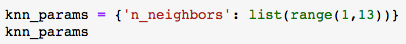

In [125]:
knn_params = {'n_neighbors': list(range(1,13))}
knn_params

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

80.png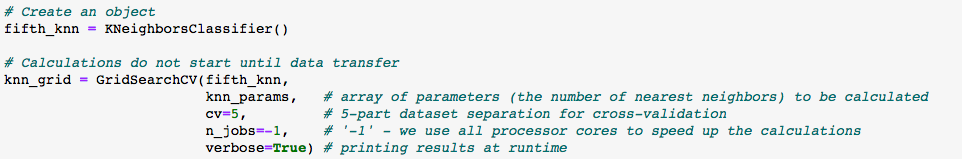

In [126]:
fifth_knn = KNeighborsClassifier()
knn_grid = GridSearchCV(fifth_knn, knn_params, cv=5, n_jobs=-1, verbose=True)

81.png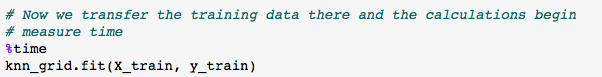

In [127]:
%time
knn_grid.fit(X_train,y_train)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 4.29 μs
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/hasnain/Desktop/Projects/intro-ml/.venv/lib64/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12]},
             verbose=True)

In [84]:
# another possible system response

In [85]:
# another possible system response

82.png

In [128]:
knn_grid.best_params_

{'n_neighbors': 7}

In [86]:
# The answer is the 7 best number of neighbors for this DataSet !

83.png

In [129]:
knn_grid.best_score_

np.float64(0.883412522630984)

#### The best accuracy is achieved by the K-nearest neighbors method on this dataset = 88.34% !

### Calculation of forecast accuracy on a test sample 

84.png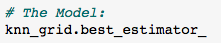

In [130]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [87]:
# another possible system response

In [88]:
knn_grid.best_estimator_?
#Classifier implementing the k-nearest neighbors vote.

Object `knn_grid.best_estimator_` not found.


85.png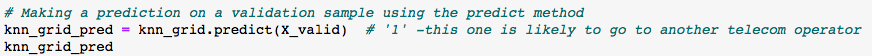

In [131]:
knn_grid_pred = knn_grid.predict(X_valid)

86.png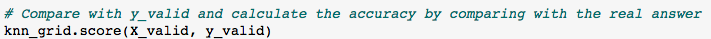

In [132]:
knn_grid.score(X_valid, y_valid)

0.899

<html> <h3 style="font-style:italic; color:Red;"> Accuracy of the model on the Test(variable is named validation) samples = 89.9% - GOOD ! </h3> </html>


87.png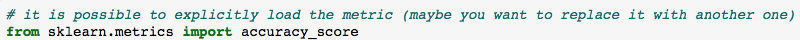

In [133]:
from sklearn.metrics import accuracy_score

88.png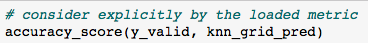

In [134]:
accuracy_score(y_valid, knn_grid_pred)

0.899

In [89]:
# Got the same result !!

### Assessment without any training

89.png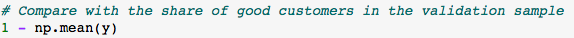

In [135]:
1 - np.mean(y)

np.float64(0.8550855085508551)

In [90]:
# 85.5% of customers in the validation sample are good customers
# This means that a model that predicts that the customer is always good (and gives only 
# positive answers) will guess at a probability of 85.5% 
# this is due to the imbalance of the dataset
# We did a little better!
